In [121]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True) 
import matplotlib.pyplot as plt
import scipy.optimize as sco


In [2]:
data1=pd.read_csv("russia.csv",index_col=0)
data2=pd.read_csv("america.csv",index_col=0)
data3=pd.read_csv("consumer.csv",index_col=0)
data4=pd.read_csv("health.csv",index_col=0)
data5=pd.read_csv("spdr.csv",index_col=0)
data6=pd.read_csv("vangue.csv",index_col=0)
data7=pd.read_csv("S&P.csv",index_col=0)


In [3]:
data2.head()

,���,����,�}��,��,�C,����q,���.,week_return_mean,week_return
2,2013�~7��14��,102.75,101.97,102.85,101.94,3.15M,0.88%,0,0.008837
3,2013�~7��21��,102.17,102.74,102.86,101.60,15.86M,-0.56%,0,-0.005645
4,2013�~7��28��,101.82,102.04,102.10,100.86,7.19M,-0.34%,0,-0.003426
5,2013�~8��4��,102.12,101.61,102.15,101.39,2.50M,0.29%,0,0.002946
6,2013�~8��11��,100.14,102.27,102.27,99.85,19.16M,-1.94%,0,-0.019389


In [4]:
a1=np.array(data1['week_return'])
a2=np.array(data2['week_return'])
a3=np.array(data3['week_return'])
a4=np.array(data4['week_return'])
a5=np.array(data5['week_return'])
a6=np.array(data6['week_return'])
a7=np.array(data7['week_return'])



In [5]:
A=np.vstack((a1,a2,a3,a4,a5,a6,a7))
print(A)

[[ 0.01587456 -0.00182149  0.00998847 ... -0.00971509  0.05357597
  -0.00554832]
 [ 0.00883652 -0.00564477 -0.00342566 ... -0.02159292 -0.01347685
  -0.02741359]
 [ 0.00893073 -0.00645933  0.00529738 ... -0.05838935  0.03849384
   0.01145707]
 ...
 [ 0.01876513 -0.00415924  0.00835322 ... -0.02229385  0.07142857
   0.01333333]
 [ 0.01153488  0.00128747  0.011205   ... -0.0240231   0.06359603
   0.00744934]
 [ 0.00990986 -0.00035467  0.01088049 ... -0.02799824  0.05820458
   0.01837938]]


In [6]:
sigma1=np.cov(A)#變異數矩陣
print(sigma1)

[[ 0.00088442 -0.00006345  0.00032689  0.00047912  0.00074034  0.00057752
   0.0005766 ]
 [-0.00006345  0.00006085 -0.00000243 -0.00002141 -0.00010428 -0.00004293
  -0.00004447]
 [ 0.00032689 -0.00000243  0.00035601  0.00030437  0.00033724  0.0003013
   0.00032463]
 [ 0.00047912 -0.00002141  0.00030437  0.00053421  0.00043824  0.00039725
   0.00042513]
 [ 0.00074034 -0.00010428  0.00033724  0.00043824  0.00088454  0.0005477
   0.00056211]
 [ 0.00057752 -0.00004293  0.0003013   0.00039725  0.0005477   0.00047703
   0.00046637]
 [ 0.0005766  -0.00004447  0.00032463  0.00042513  0.00056211  0.00046637
   0.00048953]]


In [7]:
W_mkt=np.array([ 0.0948, 0.0321, 0.0281, 0.0687, 0.0603, 0.0578, 0.6583])

In [8]:
rm=np.array([np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5),np.mean(a6),np.mean(a7)])#rm=7個資產的平均報酬
print(rm)

[0.00198108 0.00012007 0.00148939 0.00249904 0.00236648 0.00164057
 0.0024397 ]


In [72]:
rf=np.mean(a2)#無風險利率
print(rf)
delta=(rm@W_mkt-rf)/(W_mkt@sigma1@W_mkt.T)#風險趨避參數
print(delta)
pi=delta*sigma1@W_mkt#市場均衡超額報酬   
pi=np.round(pi,4)
print(pi)

0.00012006520384121395
4.587125635937978
[ 0.0027 -0.0002  0.0014  0.0019  0.0026  0.0021  0.0022]


觀點部分

In [168]:
#P因為Q為各個資產的絕對觀點 所以P為單位矩陣
P=np.identity(7)
Q=[-0.01402867,0,0.00318501,-0.02850218,0.01435457,0.02229591,-0.01486094]#7個資產LSTM跑出來預期報酬
tui=1/454#調整因子454為總樣本數#
#
omega=np.diag(tui*P@sigma1@P.T)
omega=np.diag(omega)
print(omega)

[[0.00000195 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.00000013 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.00000078 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.00000118 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.00000195 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.00000105
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00000108]]


In [169]:
#後驗ER
ER=np.linalg.inv(np.linalg.inv(tui*sigma1)+P.T@np.linalg.inv(omega)@P)@(np.linalg.inv(tui*sigma1)@pi+P.T@np.linalg.inv(omega)@Q)
ER=np.round(ER,4)
print(ER)

[-0.0022 -0.0004 -0.0006 -0.0082  0.002  -0.0002 -0.0018]


In [170]:
print(pi)

[ 0.0027 -0.0002  0.0014  0.0019  0.0026  0.0021  0.0022]


In [151]:
#新的變異數矩陣
sigma_p=np.linalg.inv(np.linalg.inv(tui*sigma1)+P.T@np.linalg.inv(omega)@P)+sigma1
print(sigma_p)

[[ 0.00088496 -0.00006347  0.00032693  0.00047924  0.00074061  0.00057774
   0.00057679]
 [-0.00006347  0.00006091 -0.00000242 -0.00002141 -0.00010434 -0.00004294
  -0.00004448]
 [ 0.00032693 -0.00000242  0.00035629  0.00030448  0.00033732  0.0003014
   0.00032475]
 [ 0.00047924 -0.00002141  0.00030448  0.00053458  0.00043832  0.00039737
   0.00042528]
 [ 0.00074061 -0.00010434  0.00033732  0.00043832  0.00088508  0.00054788
   0.0005623 ]
 [ 0.00057774 -0.00004294  0.0003014   0.00039737  0.00054788  0.00047725
   0.00046655]
 [ 0.00057679 -0.00004448  0.00032475  0.00042528  0.0005623   0.00046655
   0.00048974]]


In [152]:
#新的最佳權重
l=np.array([1,1,1,1,1,1,1])
W_new=(np.linalg.inv(sigma_p)@ER)/(l.T@np.linalg.inv(sigma_p)@ER)
print(W_new)
print(sum(W_new))

[-2.19268318  1.37987852  1.6323004  -6.32339183  2.41504351  7.6903136
 -3.60146102]
0.9999999999999982


In [153]:
print(np.round(W_new,4))#%
print(sum(np.round(W_new,4)))

[-2.1927  1.3799  1.6323 -6.3234  2.415   7.6903 -3.6015]
0.9998999999999998


In [154]:
print(ER)
print(pi)

[-0.0022 -0.0004 -0.0006 -0.0082  0.002  -0.0002 -0.0018]
[ 0.0027 -0.0002  0.0014  0.0019  0.0026  0.0021  0.0022]


最後用兩個權重分別計算夏普值比較

In [35]:
W_mkt

array([0.0948, 0.0321, 0.0281, 0.0687, 0.0603, 0.0578, 0.6583])

In [122]:
def portfolioVariance(weights): #計算组合方差
    weights = np.array(weights)
    var = np.dot(weights.T, np.dot(sigma_p, weights))
    return var

def portfolioVolatility(weights): #計算组合標準差
    return np.sqrt(np.dot(weights.T, np.dot(sigma_p, weights)))

def portfolioReturn(weights): #計算組合收益率
    return np.sum(ER * weights) 

def portfolioSharpeRatio(weights): #計算组合夏普比率
    return (portfolioReturn(weights) - rf) / portfolioVolatility(weights)

In [123]:
portfolioReturns = []
portfolioVolatilies = []

In [125]:
minRet = min(ER)
maxRet = max(ER)
trets = np.linspace(minRet, maxRet, 50)
tvols = []
weights=[]
sharpe=[]
initialWeights = np.ones(7)
bnds = tuple((0, 1) for x in initialWeights)

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  portfolioReturn(x) - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

    res = sco.minimize(portfolioVolatility, initialWeights, method='SLSQP', bounds=bnds, constraints=cons)
    frontierWeights = res['x']
    frontierRet = portfolioReturn(frontierWeights)
    frontierVol = portfolioVolatility(frontierWeights)    
    tvols.append(res['fun'])
    weights.append(frontierWeights)
    sharpe.append((frontierRet-rf)/frontierVol)

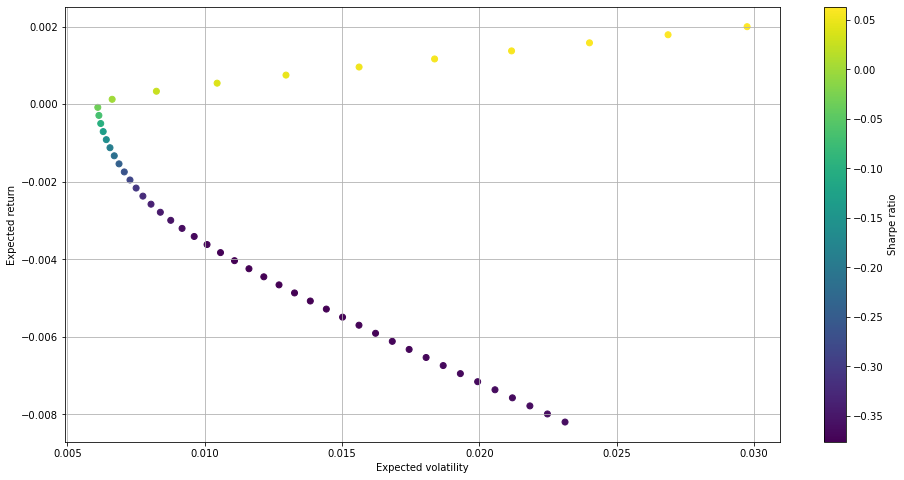

In [126]:
plt.figure(figsize=(16, 8))
plt.scatter(tvols, trets, c=(trets-rf) / tvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In [135]:
weights

[array([0.00000001, 0.        , 0.        , 0.99999999, 0.        ,
        0.        , 0.        ]),
 array([0.       , 0.0266876, 0.       , 0.9733124, 0.       , 0.       ,
        0.       ]),
 array([0.       , 0.0533752, 0.       , 0.9466248, 0.       , 0.       ,
        0.       ]),
 array([0.        , 0.08006279, 0.        , 0.91993721, 0.        ,
        0.        , 0.        ]),
 array([0.        , 0.10675039, 0.        , 0.89324961, 0.        ,
        0.        , 0.        ]),
 array([0.        , 0.13343799, 0.        , 0.86656201, 0.        ,
        0.        , 0.        ]),
 array([0.        , 0.16012559, 0.        , 0.83987441, 0.        ,
        0.        , 0.        ]),
 array([0.        , 0.18681319, 0.        , 0.81318681, 0.        ,
        0.        , 0.        ]),
 array([0.        , 0.21350078, 0.        , 0.78649922, 0.        ,
        0.        , 0.        ]),
 array([0.        , 0.24018838, 0.        , 0.75981162, 0.        ,
        0.        , 0.      

In [136]:
weights[48]

array([0.        , 0.08673469, 0.        , 0.        , 0.91326531,
       0.        , 0.        ])

In [158]:
sharpe['x']

TypeError: list indices must be integers or slices, not str

In [137]:
ER

array([-0.0022, -0.0004, -0.0006, -0.0082,  0.002 , -0.0002, -0.0018])

In [138]:
rf

0.00012006520384121395

In [167]:
Sharpe_Ratio=pd.DataFrame(sharpe,columns=["Sharpe Ratio"])
find_highest_ratio=Sharpe_Ratio[Sharpe_Ratio["Sharpe Ratio"]>=0.01].index
Weights=pd.DataFrame(weights)
Weights.loc[find_highest_ratio]

,0,1,2,3,4,5,6
41,0.000000e+00,6.938776e-01,0.000000e+00,1.709549e-19,0.306122,6.948016e-17,0.000000e+00
42,0.000000e+00,6.071429e-01,1.908196e-16,1.378208e-17,0.392857,9.857559e-17,0.000000e+00
43,0.000000e+00,5.204082e-01,1.422473e-16,1.497509e-17,0.479592,3.705302e-16,0.000000e+00
44,1.399949e-17,4.336735e-01,0.000000e+00,3.735394e-18,0.566327,0.000000e+00,0.000000e+00
45,1.166521e-17,3.469388e-01,3.469447e-17,0.000000e+00,0.653061,0.000000e+00,8.835662e-19
46,0.000000e+00,2.602041e-01,0.000000e+00,2.343634e-18,0.739796,2.428613e-17,3.776459e-18
47,1.668459e-17,1.734694e-01,1.272134e-17,0.000000e+00,0.826531,0.000000e+00,0.000000e+00
48,4.334915e-18,8.673469e-02,0.000000e+00,0.000000e+00,0.913265,4.857226e-17,8.497682e-18
49,5.854692e-18,7.146887e-11,5.421011e-20,4.336809e-19,1.000000,0.000000e+00,0.000000e+00


In [164]:
find_highest_ratio

Int64Index([], dtype='int64')

In [166]:
Sharpe_Ratio

,Sharpe Ratio
0,-0.359848
1,-0.360845
2,-0.361868
3,-0.362915
4,-0.363984
5,-0.365073
6,-0.366179
7,-0.367296
8,-0.368420
9,-0.369541
